# Step 1: Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load dataset

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 3: Standardize the data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Explained variance

In [5]:
explained = pca.explained_variance_ratio_
print("Variance explained by each component:")
print(explained)

Variance explained by each component:
[0.72962445 0.22850762 0.03668922 0.00517871]


# Step-6: Plot Variance Explained

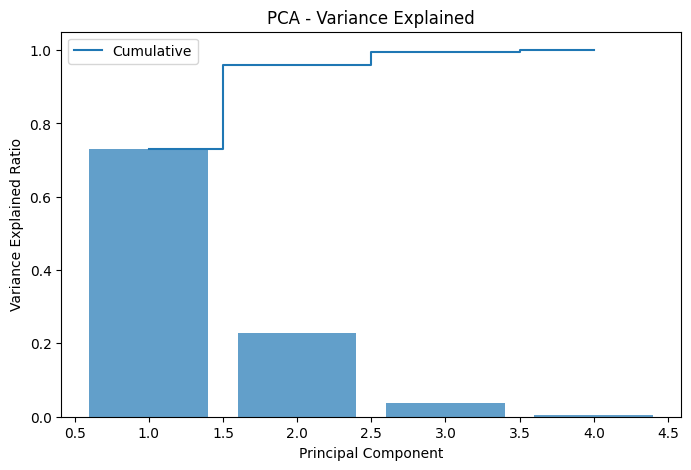

In [6]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7)
plt.step(range(1, len(explained)+1), np.cumsum(explained), where="mid", label="Cumulative")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained Ratio")
plt.title("PCA - Variance Explained")
plt.legend()
plt.show()

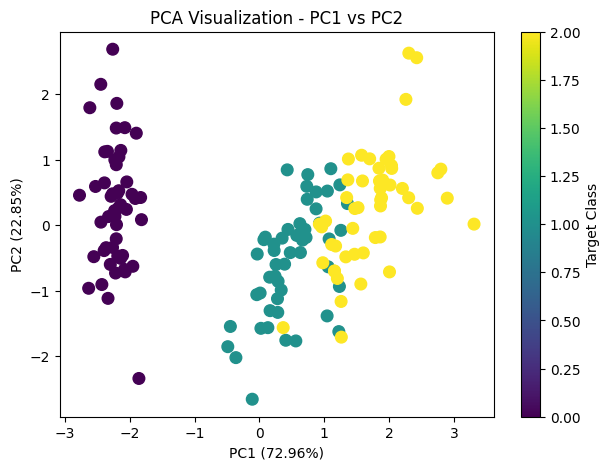

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=70)
plt.xlabel("PC1 (%.2f%%)" % (explained[0]*100))
plt.ylabel("PC2 (%.2f%%)" % (explained[1]*100))
plt.title("PCA Visualization - PC1 vs PC2")
plt.colorbar(label="Target Class")
plt.show()